### 1. searching item in amazon

In [95]:
import selenium
from selenium import webdriver
import pandas as pd
import time

In [42]:
driver = webdriver.Chrome(r"C://chromedriver.exe")

In [43]:
driver.get("https://www.amazon.in")

In [ ]:
a = input("Enter the item want to search?")

In [44]:
search_item = driver.find_element_by_xpath("//input[@id='twotabsearchtextbox']")
search_item.send_keys(a)

In [45]:
search_button = driver.find_element_by_xpath("//div[@class='nav-right']")
search_button.click()

###  2. Finding the details of entered item

In [46]:
product_name = []
price = []
rating = []
number_of_rating = []
expected_delivery = []
availability = []
product_url = []
other_details = []
return_exchange = []

In [47]:
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [48]:
links = []

for i in range(0,3): 
    
    direction = driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']/a")
    for i in direction:
        lnk = i.get_attribute(name='href')
        links.append(lnk)
        
    next_button = driver.find_element_by_xpath("//li[@class='a-last']/a")
    next_button.click()
    time.sleep(3)

In [49]:
len(links)

66

In [50]:
from selenium.common.exceptions import NoSuchElementException    
for link in links:
    driver.get(link)
    time.sleep(4)
    
    name_tag = driver.find_element_by_xpath("//span[@id='productTitle']")
    product_name.append(name_tag.text)
    
    try:
        number_rating_tag = driver.find_element_by_xpath("//span[@id='acrCustomerReviewText']")
        number_of_rating.append(number_rating_tag.text)
    except NoSuchElementException as e:
        number_of_rating.append('--')
        
    try:
        price_tag = driver.find_element_by_xpath("//span[@id='priceblock_ourprice']")
        price.append(price_tag.text)
    except NoSuchElementException as e:
        price.append('--')
        
    try:
        expect_delivery_tag = driver.find_element_by_xpath("//div[@id='ddmDeliveryMessage']/b")
        expected_delivery.append(expect_delivery_tag.text)
    except NoSuchElementException as e:
        expected_delivery.append('Not given')
        
    try:
        availability_tags = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-success']")
        availability.append(availability_tags.text)
    except NoSuchElementException as e:
        availability.append('No mentioned')
        
    try:
        other_details_tag = driver.find_elements_by_xpath(" //ul[@class='a-unordered-list a-vertical a-spacing-mini']")
        for i in other_details_tag:
            other_details.append(i.text)
    except NoSuchElementException as e:
        other_details.append('No other details')
        
    try:
        return_exchange_tag = driver.find_elements_by_xpath("//div[@class='a-section a-spacing-none']/img")
        for i in return_exchange_tag:
            image = i.get_attribute(name='src')
            if image == 'https://images-na.ssl-images-amazon.com/images/G/31/A2I-Convert/mobile/IconFarm/icon-returns._CB484059092_.png':
                return_exchange.append(i.get_attribute(name='alt'))
    except NoSuchElementException as e:
        return_exchange.append('Not mentioned')
        
    try:
        review_button = driver.find_element_by_xpath("//a[@id='acrCustomerReviewLink']")
        review_button.click()
        time.sleep(4)
        rating_tag = driver.find_element_by_xpath("//span[@class='a-size-base a-nowrap']/span")
        rating.append(rating_tag.text)
    except NoSuchElementException as e:
        rating.append('No rating')
        


In [51]:
print(len(product_name))
print(len(number_of_rating))
print(len(price))
print(len(expected_delivery))
print(len(availability))
print(len(other_details))
print(len(return_exchange))
print(len(rating))

66
66
66
66
66
63
66
66


In [211]:
rating

['No rating',
 'No rating',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.8 out of 5',
 '4.5 out of 5',
 '4 out of 5',
 '5 out of 5',
 '3.8 out of 5',
 '3.7 out of 5',
 '3.7 out of 5',
 'No rating',
 '3.8 out of 5',
 '4.3 out of 5',
 '3.2 out of 5',
 '2.9 out of 5',
 'No rating',
 'No rating',
 '3.7 out of 5',
 '5 out of 5',
 'No rating',
 'No rating',
 'No rating',
 'No rating',
 '4.2 out of 5',
 '3.6 out of 5',
 '4.1 out of 5',
 '4.1 out of 5',
 'No rating',
 '3.9 out of 5',
 '3.6 out of 5',
 '4 out of 5',
 'No rating',
 'No rating',
 '3 out of 5',
 '3.4 out of 5',
 '3.9 out of 5',
 '2.9 out of 5',
 '3.8 out of 5',
 'No rating',
 '4.3 out of 5',
 '5 out of 5',
 '3.9 out of 5',
 'No rating',
 '4.7 out of 5',
 'No rating',
 '4 out of 5',
 '4 out of 5',
 '3.2 out of 5',
 '4.1 out of 5',
 '4.1 out of 5',
 '5 out of 5',
 '3.8 out of 5',
 '3.7 out of 5',
 'No rating',
 'No rating',
 '3.4 out of 5',
 '3.7 out of 5',
 '3.4 out of 5',
 'No rating',
 'No rating',
 '4 out of 5',
 '3.6 out of 5',
 '4.4 

In [98]:
laptops = pd.DataFrame({})
laptops['Name of product'] = product_name
laptops['Rating'] = rating
laptops['Number of rating'] = number_of_rating
laptops['Price'] = price
laptops['Return/exchange'] = return_exchange
laptops['Expected delivery'] = expected_delivery
laptops['Availability'] = availability
laptops['Product URL'] = links

In [99]:
laptops

Name of product        Rating  \
0   AVITA Essential NE14A2INC433-CR 14-inch Laptop...  3.9 out of 5   
1   Lenovo Yoga Slim 7 AMD Ryzen 7 4800U 14-inch F...  4.2 out of 5   
2   HP 15 Entry Level 15.6-inch HD Laptop (AMD 302...  3.9 out of 5   
3   Asus X509MA-BR270T/ Silver/ Intel Celeron N402...  4.5 out of 5   
4   ASUS VivoBook 14 (2020) Intel Quad Core Pentiu...  3.7 out of 5   
..                                                ...           ...   
61  Dell INSPIRON 7567 Intel_Core_i7-7700HQ/ 16GB ...     No rating   
62  Lenovo IdeaPad Flex 5 11th Gen Intel Core i7 1...  4.1 out of 5   
63  HP 15 Intel Pentium Gold 6405U Processor Entry...  3.6 out of 5   
64  Lenovo IdeaPad S540 10th Gen Intel Core i5 15....  4.6 out of 5   
65  Lenovo IdeaPad Slim 5 11th Gen Intel Core i5 1...    5 out of 5   

   Number of rating        Price     Return/exchange   Expected delivery  \
0       463 ratings           --  7 Days Replacement    Monday, April 26   
1        19 ratings  ₹ 72,390.00  7 Days Replacement   Tuesday, April 27   
2       440 ratings  ₹ 23,990.00  7 Days Replacement       April 25 - 28   
3         2 ratings  ₹ 23,300.00  7 Days Replacement    Friday, April 30   
4        22 ratings  ₹ 24,990.00  7 Days Replacement    Monday, April 26   
..              ...          ...                 ...                 ...   
61               --  ₹ 62,990.00  7 Days Replacement     Thursday, May 6   
62        5 ratings  ₹ 83,990.00  7 Days Replacement    Monday, April 26   
63      167 ratings  ₹ 26,599.00  7 Days Replacement    Monday, April 26   
64       38 ratings  ₹ 60,990.00  7 Days Replacement  Thursday, April 29   
65        2 ratings  ₹ 58,788.00  7 Days Replacement    Monday, April 26   

    Availability                                        Product URL  
0      In stock.  https://www.amazon.in/gp/slredirect/picassoRed...  
1      In stock.  https://www.amazon.in/gp/slredirect/picassoRed...  
2   No mentioned  https://www.amazon.in/HP-15-6-inch-Laptop-Wind...  
3      In stock.  https://www.amazon.in/Asus-X509MA-BR270T-Silve...  
4      In stock.  https://www.amazon.in/ASUS-Pentium-Silver-N503...  
..           ...                                                ...  
61     In stock.  https://www.amazon.in/Dell-INSPIRON-7567-Intel...  
62     In stock.  https://www.amazon.in/Lenovo-Touchscreen-Finge...  
63     In stock.  https://www.amazon.in/HP-Pentium-Processor-15-...  
64     In stock.  https://www.amazon.in/gp/slredirect/picassoRed...  
65     In stock.  https://www.amazon.in/gp/slredirect/picassoRed...  

[66 rows x 8 columns]

In [100]:
laptops.to_csv('laptops_details.csv')

### 3. google images

In [52]:
driver1 = webdriver.Chrome(r"C://chromedriver.exe")

In [91]:
driver1.get('https://images.google.com')

In [92]:
search_list = ['fruits','cars','Machine learning']
fruits = []
cars = []
machine_learning = []

for thing in search_list:
    search_item_button = driver1.find_element_by_xpath("//input[@class='gLFyf gsfi']")
    search_item_button.send_keys(thing)

    search_button = driver1.find_element_by_xpath("//button[@class='Tg7LZd']")
    search_button.click()
    time.sleep(3)
    
    if thing == 'fruits':
        img_tags = driver1.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
        for i in img_tags[0:200]:  
            fruits.append(i.get_attribute(name='src'))
            for i in range(500):
                driver1.execute_script("window.scrollBy(0,10000)")
        time.sleep(15)
            
    elif thing== 'cars':
        img_tags = driver1.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
        for i in img_tags[0:200]:
            cars.append(i.get_attribute(name='src'))
            for i in range(500):
                driver1.execute_script("window.scrollBy(0,10000)")
        time.sleep(15)
            
    elif thing == 'Machine learning':
        img_tags = driver1.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
        for i in img_tags:
            machine_learning.append(i.get_attribute(name='src'))
            for i in range(500):
                driver1.execute_script("window.scrollBy(0,10000)") 
        time.sleep(20)
            
    driver1.get('https://images.google.com')

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlPV8Go6ZznEVq5hHrCC4laguHXi8Dp515JQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTo4_shfG85msF591Y45W4T800Efmd5L8ksvg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrze6YgEOUkpBVygJ4r2nujU1dmBU0HPkdIw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGHJT8q-l4tpC1yJh-mnZTLpp1feWPFNBJ2g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTEdh7imug2U0iXhoIV7ERKxAiTvhxyFWEZCw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBog_DenMpYuOakKUxnslSJc6cc41l_fsb6w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYtQ7VJ12OJGHpaF21VHfF3Vu-lF_9cQ32ug&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRdUDfOELEltqFcW_9mpgkgI04gN9BfYjya_Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQhV-djjjKbn
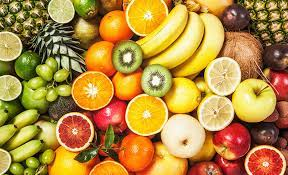
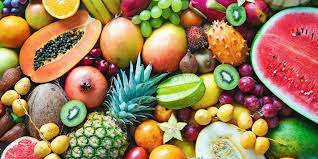
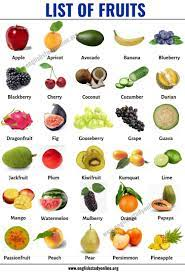
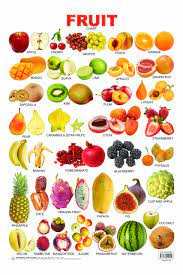
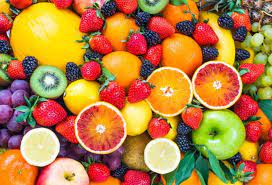
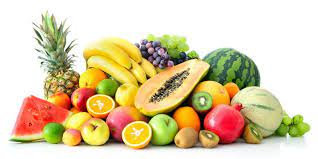
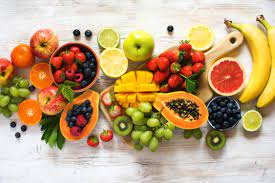
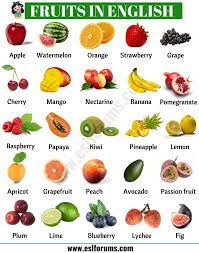
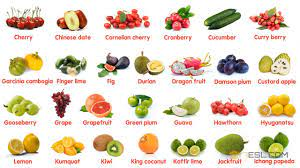
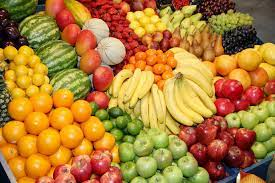
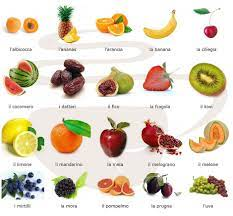
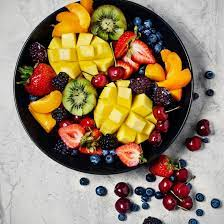
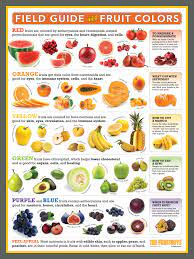
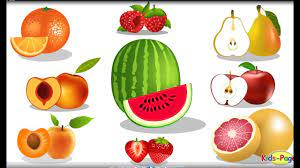
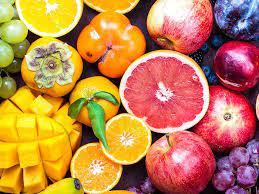
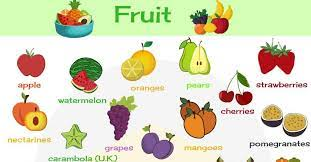
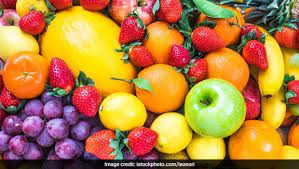
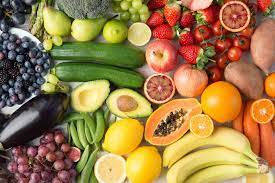
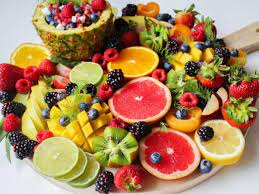
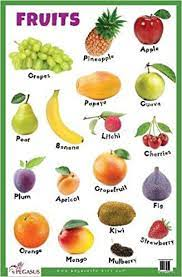

In [34]:
fruits

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQjBHWfRvri4hUjmGWPUPCorhGfoTbdRVHSg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyKVWS5qC-aGHvy5yPSZ4Auh7F_mbfJqzYYQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTL8es92nEfJZrPYTja1BR9UumhnPnF3ObsWQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7X_TNzLL4j8hpatJUcU8IHJ8xSNGNcz8mOA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR93zJXbzMe4j2DW2HS9YYwhjVGJvpIWFzOrg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkjXP8X0w46em9bcD8NuKKwmVDV5eVLSETdA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTfVr5KtPFAqPlHyktjzgxzldpYDH60JGTKQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzmdjPPbqMFfeig7RTITLu19BwflVQoIgRgQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRK4zvh5D1Y5f
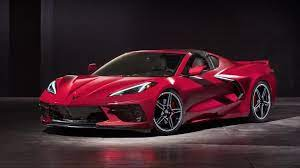
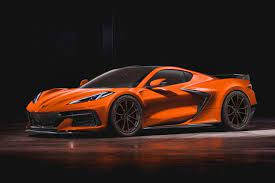
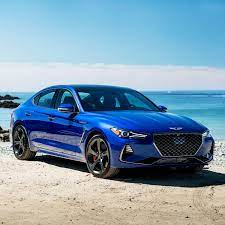
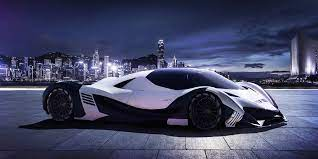
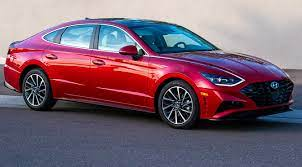
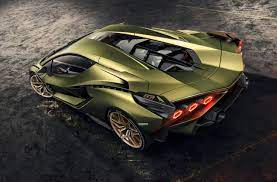
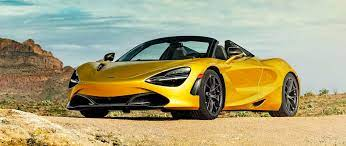
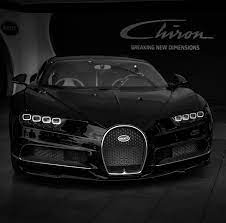
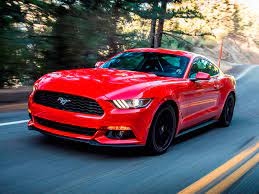
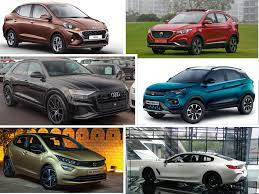
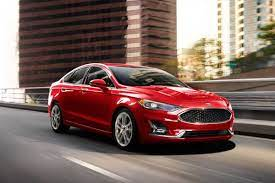
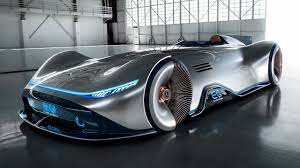
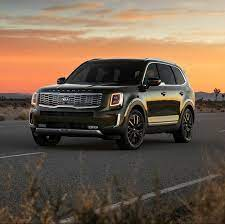
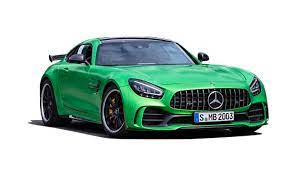
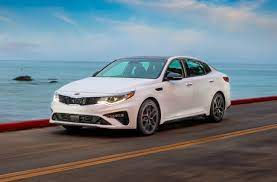
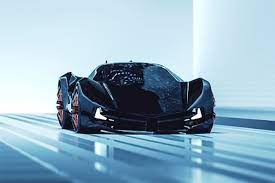
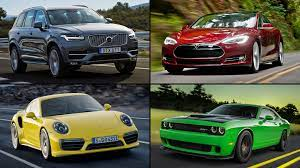
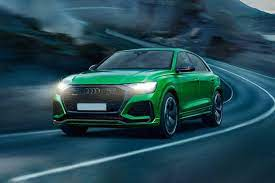
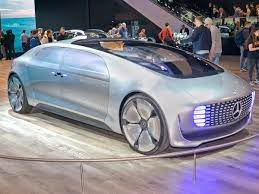
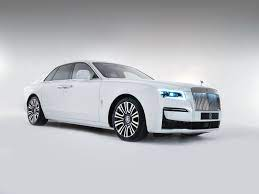

In [35]:
cars

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxRTTGG2Lyf5m7Y_zt1U3eZ1uVp0dubrFIdw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxVFK-XSgdT_lK95joMfDupTEhhpcMZ7590g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEMHTPfP9YZM7V99dKJrGBiDwui2iBsniBjg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToqqMfOrfY6GZ4px8jFHkK_4NtQHwzHP3Npg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8abGOPPGSsXlL1LCDbx86fl36YVe5JaEHaw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrT3TniqvNeIBy5HpWmHVNDtmn1TazaB45wA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNYkZLW3iUc9ksvBB_uVgcLL_evUZkgYAlJA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRPeschGofM89XN7EC4Y-c6ZXrOe8qMnti18A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoBmmMed7Qxw
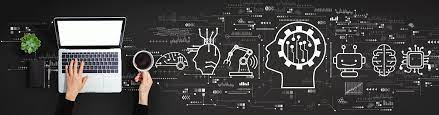
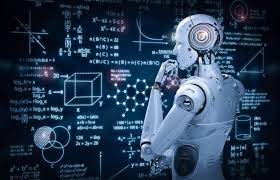
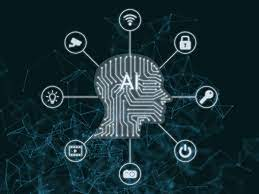
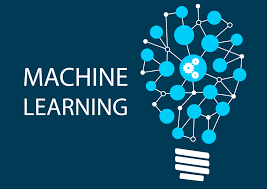
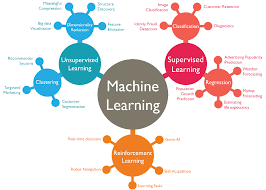
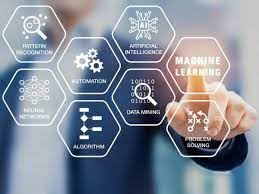
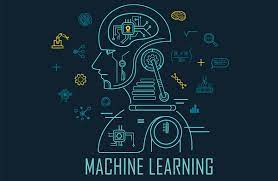
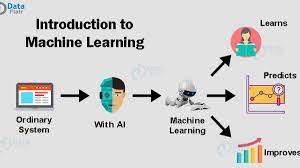
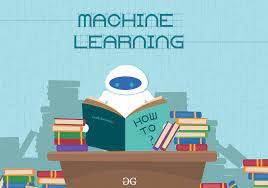
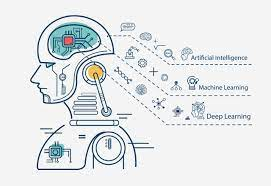
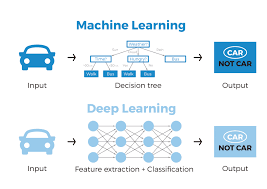
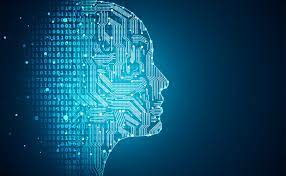
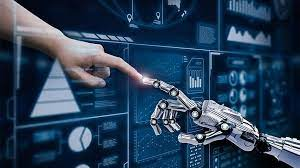
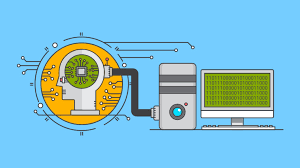
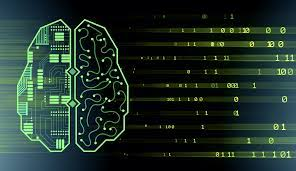
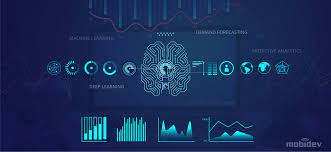
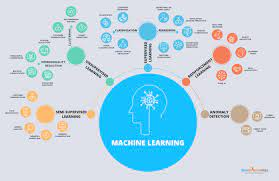
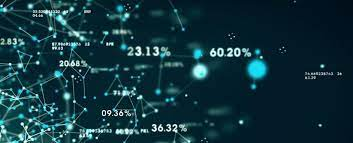
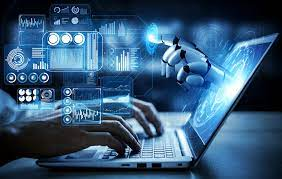
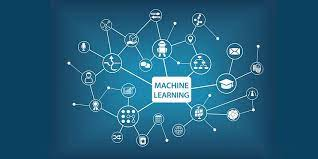

In [36]:
machine_learning

In [93]:
print(len(fruits))
print(len(machine_learning))
print(len(cars))

49
49
49


In [88]:
search_item_button = driver1.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_item_button.send_keys('fruits')

search_button = driver1.find_element_by_xpath("//button[@class='Tg7LZd']")
search_button.click()
time.sleep(3)

In [89]:
img_tags = driver1.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in img_tags[0:200]:  
    fruits.append(i.get_attribute(name='src'))
    for i in range(500):
        driver1.execute_script("window.scrollBy(0,900)")
time.sleep(15)

In [90]:
len(fruits)

147

### 4. Flipkart mobiles

In [101]:
driver = webdriver.Chrome(r"C://chromedriver.exe")

In [114]:
driver.get('https://www.flipkart.com')

In [115]:
search_item_button = driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_item_button.send_keys('poco x3 pro')

In [116]:
search_button = driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_button.click()

In [117]:
links = []

links_tags = driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
for i in links_tags:
    lnk = i.get_attribute(name='href')
    links.append(lnk)
    
links

['https://www.flipkart.com/poco-x3-pro-steel-blue-128-gb/p/itm92bc566db15d8?pid=MOBGFKNFXBYGHFHJ&lid=LSTMOBGFKNFXBYGHFHJM8QVIC&marketplace=FLIPKART&q=poco+x3+pro&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=24d641c9-68c9-4d95-b530-2887decf1281.MOBGFKNFXBYGHFHJ.SEARCH&ppt=hp&ppn=homepage&ssid=sh3gjlx6ww0000001619325963109&qH=5fa2a9dbeb17d9d2',
 'https://www.flipkart.com/poco-x3-pro-graphite-black-128-gb/p/itm736059fa07afb?pid=MOBGFKNFRJDN3DS4&lid=LSTMOBGFKNFRJDN3DS4PPS28U&marketplace=FLIPKART&q=poco+x3+pro&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=24d641c9-68c9-4d95-b530-2887decf1281.MOBGFKNFRJDN3DS4.SEARCH&ppt=hp&ppn=homepage&ssid=sh3gjlx6ww0000001619325963109&qH=5fa2a9dbeb17d9d2',
 'https://www.flipkart.com/poco-x3-pro-steel-blue-128-gb/p/itm527548fcdf883?pid=MOBGFKNF6HFYZWPY&lid=LSTMOBGFKNF6HFYZWPYQIBQSW&marketplace=FLIPKART&q=poco+x3+pro&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=24d641c9-68c

In [107]:
len(links)

15

In [137]:
smart_phone_name = []
color = []
RAM = []
storage = []
primary_camera = []
secondary_camera = []
display_size = []
display_resolution = []
processor = []
processor_cores = []
battery_size = []
price = []
product_url = []

In [138]:
for link in links:
    driver.get(link)
    
    read_more = driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']")
    read_more.click()
    
    try:
        product_name_tags = driver.find_elements_by_xpath("//span[@class='B_NuCI']")
        for i in product_name_tags:
            smart_phone_name.append(i.text)
    except NoSuchElementException as e:
        smart_phone_name.append("--")
        
    try:
        color_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][1]/table[1]/tbody/tr[4]/td[2]/ul/li")
        color.append(color_tag.text)
    except NoSuchElementException as e:
        color.append("--")
        
    try:
        ram_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][4]/table[1]/tbody/tr[2]/td[2]/ul/li")
        RAM.append(ram_tag.text)
    except NoSuchElementException as e:
        RAM.append('--')
        
    try:
        storage_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][4]/table[1]/tbody/tr[1]/td[2]/ul/li")
        storage.append(storage_tag.text)
    except NoSuchElementException as e:
        storage.append('--')
        
    try:
        primary_camera_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][5]/table[1]/tbody/tr[2]/td[2]/ul/li")
        primary_camera.append(primary_camera_tag.text)
    except NoSuchElementException as e:
        primary_camera.append('--')
        
    try:
        secondary_camera_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][5]/table[1]/tbody/tr[5]/td[2]/ul/li")
        secondary_camera.append(secondary_camera_tag.text)
    except NoSuchElementException as e:
        secondary_camera.append('--')
                                                            
        
    try:
        display_size_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][2]/table[1]/tbody/tr[1]/td[2]/ul/li")
        display_size.append(display_size_tag.text)
    except NoSuchElementException as e:
        display_size.append('--')
        
    try:
        display_resolution_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][2]/table[1]/tbody/tr[2]/td[2]/ul/li")
        display_resolution.append(display_resolution_tag.text)
    except NoSuchElementException as e:
        display_resolution.append("--")
        
    try:
        processor_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][3]/table[1]/tbody/tr[2]/td[2]/ul/li")
        processor.append(processor_tag.text)
    except NoSuchElementException as e:
        processor.append('--')
        
    try:
        processor_cores_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][3]/table[1]/tbody/tr[3]/td[2]/ul/li")
        processor_cores.append(processor_cores_tag.text)
    except NoSuchElementException as e:
        processor_cores.append('--')
        
    try:
        battery_size_tag = driver.find_element_by_xpath("//div[@class='_3k-BhJ'][9]/table[1]/tbody/tr[1]/td[2]/ul/li")
        if battery_size_tag.text == '5160 mAh':
            battery_size.append(battery_size_tag.text)
        else:
            battery_size.append('--')
    except NoSuchElementException as e:
        battery_size.append('--')
        
    try:
        price_tag = driver.find_element_by_xpath("//div[@class='dyC4hf']/div/div/div[1]")
        price.append(price_tag.text)
    except NoSuchElementException as e:
        price.append('--')
        
    time.sleep(2)

In [139]:
print(len(smart_phone_name))
print(len(color))
print(len(RAM))
print(len(storage))
print(len(primary_camera))
print(len(secondary_camera))
print(len(display_size))
print(len(display_resolution))
print(len(processor))
print(len(processor_cores))
print(len(battery_size))
print(len(price))

15
15
15
15
15
15
15
15
15
15
15
15


In [140]:
battery_size

['5160 mAh',
 '5160 mAh',
 '5160 mAh',
 '5160 mAh',
 '5160 mAh',
 '5160 mAh',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--']

In [136]:
smart_phone_name

['POCO X3 Pro (Steel Blue, 128 GB)  (6 GB RAM)',
 'POCO X3 Pro (Graphite Black, 128 GB)  (6 GB RAM)',
 'POCO X3 Pro (Steel Blue, 128 GB)  (8 GB RAM)',
 'POCO X3 Pro (Graphite Black, 128 GB)  (8 GB RAM)',
 'POCO X3 Pro (Golden Bronze, 128 GB)  (8 GB RAM)',
 'POCO X3 Pro (Golden Bronze, 128 GB)  (6 GB RAM)',
 'POCO M2 Pro (Out of the Blue, 64 GB)  (6 GB RAM)',
 'POCO M2 Pro (Green and Greener, 64 GB)  (6 GB RAM)',
 'POCO M2 Pro (Two Shades of Black, 64 GB)  (4 GB RAM)',
 'POCO M2 Pro (Two Shades of Black, 64 GB)  (6 GB RAM)',
 'POCO M2 Pro (Green and Greener, 128 GB)  (6 GB RAM)',
 'POCO M2 Pro (Two Shades of Black, 128 GB)  (6 GB RAM)',
 'POCO M2 Pro (Out of the Blue, 128 GB)  (6 GB RAM)',
 'POCO M2 Pro (Out of the Blue, 64 GB)  (4 GB RAM)',
 'POCO M2 Pro (Green and Greener, 64 GB)  (4 GB RAM)']

In [141]:
flipkart_phone = pd.DataFrame({})
flipkart_phone['Smart phone name']=smart_phone_name
flipkart_phone['Color']=color
flipkart_phone['RAM']=RAM
flipkart_phone['Storage(ROM)']=storage
flipkart_phone['Primary camera']=primary_camera
flipkart_phone['Secondary camera']=secondary_camera
flipkart_phone['Display_size']=display_size
flipkart_phone['Display resolution']=display_resolution
flipkart_phone['Processor type']=processor
flipkart_phone['Processor core']=processor_cores
flipkart_phone['Battery size']=battery_size
flipkart_phone['Price']=price
flipkart_phone['URL']=links

In [142]:
flipkart_phone

Smart phone name                Color  \
0        POCO X3 Pro (Steel Blue, 128 GB)  (6 GB RAM)           Steel Blue   
1    POCO X3 Pro (Graphite Black, 128 GB)  (6 GB RAM)       Graphite Black   
2        POCO X3 Pro (Steel Blue, 128 GB)  (8 GB RAM)           Steel Blue   
3    POCO X3 Pro (Graphite Black, 128 GB)  (8 GB RAM)       Graphite Black   
4     POCO X3 Pro (Golden Bronze, 128 GB)  (8 GB RAM)        Golden Bronze   
5     POCO X3 Pro (Golden Bronze, 128 GB)  (6 GB RAM)        Golden Bronze   
6    POCO M2 Pro (Out of the Blue, 64 GB)  (6 GB RAM)      Out of the Blue   
7   POCO M2 Pro (Green and Greener, 64 GB)  (6 GB ...    Green and Greener   
8   POCO M2 Pro (Two Shades of Black, 64 GB)  (4 G...  Two Shades of Black   
9   POCO M2 Pro (Two Shades of Black, 64 GB)  (6 G...  Two Shades of Black   
10  POCO M2 Pro (Green and Greener, 128 GB)  (6 GB...    Green and Greener   
11  POCO M2 Pro (Two Shades of Black, 128 GB)  (6 ...  Two Shades of Black   
12  POCO M2 Pro (Out of the Blue, 128 GB)  (6 GB RAM)      Out of the Blue   
13   POCO M2 Pro (Out of the Blue, 64 GB)  (4 GB RAM)      Out of the Blue   
14  POCO M2 Pro (Green and Greener, 64 GB)  (4 GB ...    Green and Greener   

     RAM Storage(ROM)          Primary camera   Secondary camera  \
0   6 GB       128 GB  48MP + 8MP + 2MP + 2MP  20MP Front Camera   
1   6 GB       128 GB  48MP + 8MP + 2MP + 2MP  20MP Front Camera   
2   8 GB       128 GB  48MP + 8MP + 2MP + 2MP  20MP Front Camera   
3   8 GB       128 GB  48MP + 8MP + 2MP + 2MP  20MP Front Camera   
4   8 GB       128 GB  48MP + 8MP + 2MP + 2MP  20MP Front Camera   
5   6 GB       128 GB  48MP + 8MP + 2MP + 2MP  20MP Front Camera   
6   6 GB        64 GB  48MP + 8MP + 5MP + 2MP  16MP Front Camera   
7   6 GB        64 GB  48MP + 8MP + 5MP + 2MP  16MP Front Camera   
8   4 GB        64 GB  48MP + 8MP + 5MP + 2MP  16MP Front Camera   
9   6 GB        64 GB  48MP + 8MP + 5MP + 2MP  16MP Front Camera   
10  6 GB       128 GB  48MP + 8MP + 5MP + 2MP  16MP Front Camera   
11  6 GB       128 GB  48MP + 8MP + 5MP + 2MP  16MP Front Camera   
12  6 GB       128 GB  48MP + 8MP + 5MP + 2MP  16MP Front Camera   
13  4 GB        64 GB  48MP + 8MP + 5MP + 2MP  16MP Front Camera   
14  4 GB        64 GB  48MP + 8MP + 5MP + 2MP  16MP Front Camera   

            Display_size  Display resolution            Processor type  \
0   16.94 cm (6.67 inch)  2400 x 1080 Pixels   Qualcomm Snapdragon 860   
1   16.94 cm (6.67 inch)  2400 x 1080 Pixels   Qualcomm Snapdragon 860   
2   16.94 cm (6.67 inch)  2400 x 1080 Pixels   Qualcomm Snapdragon 860   
3   16.94 cm (6.67 inch)  2400 x 1080 Pixels   Qualcomm Snapdragon 860   
4   16.94 cm (6.67 inch)  2400 x 1080 Pixels   Qualcomm Snapdragon 860   
5   16.94 cm (6.67 inch)  2400 x 1080 Pixels   Qualcomm Snapdragon 860   
6   16.94 cm (6.67 inch)  2400 x 1080 Pixels  Qualcomm Snapdragon 720G   
7   16.94 cm (6.67 inch)  2400 x 1080 Pixels  Qualcomm Snapdragon 720G   
8   16.94 cm (6.67 inch)  2400 x 1080 Pixels  Qualcomm Snapdragon 720G   
9   16.94 cm (6.67 inch)  2400 x 1080 Pixels  Qualcomm Snapdragon 720G   
10  16.94 cm (6.67 inch)  2400 x 1080 Pixels  Qualcomm Snapdragon 720G   
11  16.94 cm (6.67 inch)  2400 x 1080 Pixels  Qualcomm Snapdragon 720G   
12  16.94 cm (6.67 inch)  2400 x 1080 Pixels  Qualcomm Snapdragon 720G   
13  16.94 cm (6.67 inch)  2400 x 1080 Pixels  Qualcomm Snapdragon 720G   
14  16.94 cm (6.67 inch)  2400 x 1080 Pixels  Qualcomm Snapdragon 720G   

   Processor core Battery size    Price  \
0       Octa Core     5160 mAh  ₹18,999   
1       Octa Core     5160 mAh  ₹18,999   
2       Octa Core     5160 mAh  ₹20,999   
3       Octa Core     5160 mAh  ₹20,999   
4       Octa Core     5160 mAh  ₹20,999   
5       Octa Core     5160 mAh  ₹18,999   
6       Octa Core           --  ₹13,999   
7       Octa Core           --  ₹13,999   
8       Octa Core           --  ₹12,999   
9       Octa Core           --  ₹13,999   
10      Octa Core           --  ₹15,999  

In [143]:
flipkart_phone.to_csv('flipkart_phone_details.csv')

### 5. Geospatial Coordinates In Google Maps

In [144]:
driver = webdriver.Chrome(r'C://chromedriver.exe')

In [169]:
driver.get('https://maps.google.com')

In [170]:
city_button = driver.find_element_by_xpath("//div[@class='gstl_50 sbib_a']/div[3]/div/input[1]")
city_button.send_keys('Marathahalli, Bangalore')

In [171]:
search_button = driver.find_element_by_xpath("//div[@class='searchbox-searchbutton-container']/button")
search_button.click()

In [172]:
get_url= driver.current_url

In [173]:
print(get_url)

https://www.google.com/maps/place/Marathahalli,+Bengaluru,+Karnataka/@12.9774749,77.5768636,13z/data=!4m5!3m4!1s0x3bae13b4551d0957:0x597894d77e1e4919!8m2!3d12.956924!4d77.701127


In [174]:
import re

numb = re.findall('\d*\.?\d+',get_url)

numb

['12.9774749',
 '77.5768636',
 '13',
 '4',
 '5',
 '3',
 '4',
 '1',
 '0',
 '3',
 '13',
 '4551',
 '0957',
 '0',
 '597894',
 '77',
 '1',
 '4919',
 '8',
 '2',
 '3',
 '12.956924',
 '4',
 '77.701127']

In [176]:
coordinates = numb[0:2]

In [177]:
coordinates

['12.9774749', '77.5768636']

### 6.Track.in

In [179]:
driver = webdriver.Chrome(r'C://chromedriver.exe')

In [189]:
driver.get('https://www.digit.in')

In [190]:
search1 = driver.find_element_by_xpath("//div[@class='menu']/ul/li[3]")
search1.click()

In [193]:
best_gaming_laptop_in_india = driver.find_element_by_xpath("//div[@class='Listbrand']/ul/li[10]")
best_gaming_laptop_in_india.click()

In [194]:
links = []

links_tag = driver.find_elements_by_xpath("//div[@class='right-container']/div/a")
for i in links_tag:
    lnk= i.get_attribute(name='href')
    links.append(lnk)
    
links


['https://www.digit.in/laptops/msi-gt76-titan-dt-9sg-price-193526.html',
 'https://www.digit.in/laptops/alienware-area-51m-core-i9-9900k-rtx-2080-price-193540.html',
 'https://www.digit.in/laptops/hp-omen-15-2020-price-207633.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-g14-price-209173.html',
 'https://www.digit.in/laptops/lenovo-legion-y540-price-184975.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-g-ga502-price-187290.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-s-gx531-price-183275.html',
 'https://www.digit.in/laptops/msi-gt83vr-7re-titan-sli-price-55229.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-duo-15-price-215799.html',
 'https://www.digit.in/laptops/dell-g3-15-price-172543.html']

In [211]:
os = []
processor = []
display = []
memory= []
price = []
model_name = []
launch_date = []

In [212]:
for link in links:
    driver.get(link)
    
    try:
        os_tags = driver.find_element_by_xpath("//div[@class='Specs-Wrap  notspecs ']/ul/li[1]/div")
        os.append(os_tags.text)
    except NoSuchElementException as e:
        os.append('--')
        
    try:
        display_tags = driver.find_element_by_xpath("//div[@class='Specs-Wrap  notspecs ']/ul/li[2]/div")
        display.append(display_tags.text)
    except NoSuchElementException as e:
        display.append('--')
        
    try:
        processor_tags = driver.find_element_by_xpath("//div[@class='Specs-Wrap  notspecs ']/ul/li[3]/div")
        processor.append(processor_tags.text)
    except NoSuchElementException as e:
        processor.append('--')
        
    try:
        memory_tags = driver.find_element_by_xpath("//div[@class='Specs-Wrap  notspecs ']/ul/li[4]/div")
        memory.append(memory_tags.text)
    except NoSuchElementException as e:
        memory.append('--')
        
    try:
        price_tags = driver.find_element_by_xpath("//div[@class='Block-price']/b")
        price.append(price_tags.text)
    except NoSuchElementException as e:
        price.append('--')
        
    try:
        model_tags = driver.find_element_by_xpath("//div[@class='heading-wraper']/h1")
        model_name.append(model_tags.text)
    except NoSuchElementException as e:
        model_name.append('--')
        
    try:
        launch_date_tags = driver.find_element_by_xpath("//div[@class='remaining-details']/table/tbody/tr[2]/td[3]")
        launch_date.append(launch_date_tags.text)
        
    except NoSuchElementException as e:
        launch_date.append('--')
        
    time.sleep(2)
        


In [227]:
launch_date

['10-08-2019',
 '01-12-2019',
 '21-07-2020',
 'Windows 10 Home',
 '15-07-2019',
 '30-08-2019',
 '31-05-2019',
 'Windows 10 Home 64 bit',
 'Windows 10',
 '23-10-2018']

In [225]:
new_launch_date = []
from nltk.tokenize import regexp_tokenize
for i in launch_date:
    if len(i) == 10:
        new_launch_date.append(i)
    else:
        new_launch_date.append('--')
    

new_launch_date

['10-08-2019',
 '01-12-2019',
 '21-07-2020',
 '--',
 '15-07-2019',
 '30-08-2019',
 '31-05-2019',
 '--',
 'Windows 10',
 '23-10-2018']

In [226]:
for n, i in enumerate(new_launch_date):
    if i == 'Windows 10':
        new_launch_date[n] = "--"
new_launch_date   

['10-08-2019',
 '01-12-2019',
 '21-07-2020',
 '--',
 '15-07-2019',
 '30-08-2019',
 '31-05-2019',
 '--',
 '--',
 '23-10-2018']

In [213]:
os

['Windows 10 Pro',
 'Windows 10 Pro',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home 64 Bit',
 'Windows 10',
 'Windows 10 Home Plus']

In [214]:
display

['17.3" (UHD 3840x2160)',
 '17.3" (FHD (1920 X 1080))',
 '15.6" (1920 X 1080)',
 '14" (1920 X 1080)',
 '15.6" (1920 X 1080)',
 '15.6" (1920 X 1080)',
 '15.6" (1920 X 1080)',
 '18.4" (1920 X 1080)',
 '15.6" (3840 X 1100)',
 '15.6 MP | NA']

In [215]:
processor

['Intel 9th Gen Core I9-9900K | 5000 MHz',
 'Intel 9th Gen Core I9-9900K | 5000 MHz',
 'Intel I7-10750H 10th Gen | 1.6GHz',
 'AMD 3rd Generation Ryzen 9 | 3.3 GHz',
 '9th Generation Core Intel I7-9750H | 2.6 Ghz',
 'AMD Ryzen 7 Quad Core 3750H | 2.3 GHz',
 '9th Gen Intel Core I7-8750H | 2.2 GHz',
 'Intel CM238 Core I7-7820HK+CM238 7th Gen | 3.5GHz',
 'Intel Core I7 10th Gen 10875H | NA',
 '8th Gen Intel Core I5-8300H | 2.3GHz']

In [216]:
memory

['1 TB HDD/64 GBGB DDR4',
 '1 TB PCIe SSD/32GB DDR4',
 '512 GB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/8GB DDR4',
 '512 GB SSD/16GB DDR4',
 '512GB SSD/16 GBGB DDR4',
 '1.5 TB SATA/64GB DDR4',
 '512 GB SSD/4 GBGB DDR4',
 '1TB HDD/8GB DDR4']

In [217]:
price

['379,990',
 '422,000',
 '117,790',
 '164,990',
 '79,990',
 '79,990',
 '239,990',
 '349,990',
 '244,990',
 '61,990']

In [218]:
model_name

['MSI GT76 TITAN DT 9SG',
 'Alienware Area-51m (Core I9-9900K+RTX 2080)',
 'HP OMEN 15 2020',
 'Asus ROG Zephyrus G14',
 'LENOVO LEGION Y540',
 'Asus ROG Zephyrus G GA502',
 'Asus ROG Zephyrus S GX531',
 'MSI GT83VR 7RE Titan SLI',
 'Asus ROG Zephyrus Duo 15',
 'Dell G3 15']

In [229]:
gaming_laptop = pd.DataFrame({})
gaming_laptop['Model name'] = model_name
gaming_laptop['Price'] = price
gaming_laptop['OS'] = os
gaming_laptop['Processor'] = processor
gaming_laptop['Display'] = display
gaming_laptop['Memory'] = memory
gaming_laptop['Launch date'] = new_launch_date

In [230]:
gaming_laptop

Model name    Price  \
0                        MSI GT76 TITAN DT 9SG  379,990   
1  Alienware Area-51m (Core I9-9900K+RTX 2080)  422,000   
2                              HP OMEN 15 2020  117,790   
3                        Asus ROG Zephyrus G14  164,990   
4                           LENOVO LEGION Y540   79,990   
5                    Asus ROG Zephyrus G GA502   79,990   
6                    Asus ROG Zephyrus S GX531  239,990   
7                     MSI GT83VR 7RE Titan SLI  349,990   
8                     Asus ROG Zephyrus Duo 15  244,990   
9                                   Dell G3 15   61,990   

                       OS                                          Processor  \
0          Windows 10 Pro             Intel 9th Gen Core I9-9900K | 5000 MHz   
1          Windows 10 Pro             Intel 9th Gen Core I9-9900K | 5000 MHz   
2         Windows 10 Home                  Intel I7-10750H 10th Gen | 1.6GHz   
3         Windows 10 Home               AMD 3rd Generation Ryzen 9 | 3.3 GHz   
4         Windows 10 Home       9th Generation Core Intel I7-9750H | 2.6 Ghz   
5         Windows 10 Home              AMD Ryzen 7 Quad Core 3750H | 2.3 GHz   
6         Windows 10 Home              9th Gen Intel Core I7-8750H | 2.2 GHz   
7  Windows 10 Home 64 Bit  Intel CM238 Core I7-7820HK+CM238 7th Gen | 3.5GHz   
8              Windows 10                 Intel Core I7 10th Gen 10875H | NA   
9    Windows 10 Home Plus               8th Gen Intel Core I5-8300H | 2.3GHz   

                     Display                   Memory Launch date  
0      17.3" (UHD 3840x2160)    1 TB HDD/64 GBGB DDR4  10-08-2019  
1  17.3" (FHD (1920 X 1080))  1 TB PCIe SSD/32GB DDR4  01-12-2019  
2        15.6" (1920 X 1080)  512 GB SSD/16 GBGB DDR4  21-07-2020  
3          14" (1920 X 1080)    1 TB SSD/16 GBGB DDR4          --  
4        15.6" (1920 X 1080)        1 TB SSD/8GB DDR4  15-07-2019  
5        15.6" (1920 X 1080)     512 GB SSD/16GB DDR4  30-08-2019  
6        15.6" (1920 X 1080)   512GB SSD/16 GBGB DDR4  31-05-2019  
7        18.4" (1920 X 1080)    1.5 TB SATA/64GB DDR4          --  
8        15.6" (3840 X 1100)   512 GB SSD/4 GBGB DDR4          --  
9               15.6 MP | NA         1TB HDD/8GB DDR4  23-10-2018